In [ ]:
import joblib
import pandas as pd

In [ ]:
result = joblib.load("results/flights_results.pkl")

In [ ]:
(f1_dict, MSE_dict, interaction_freq_Naive, interaction_freq_MLE,
            main_effects_freq_Naive, main_effects_freq_MLE) = result

In [ ]:
f1_dict.keys()

In [ ]:
f1_df = pd.DataFrame(f1_dict)
f1_df.replace({'method': {"MLE": "Proposed"}}, inplace=True)

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_24982/234370652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b1 = sns.boxplot(


Text(0, 0.5, 'F1 score')

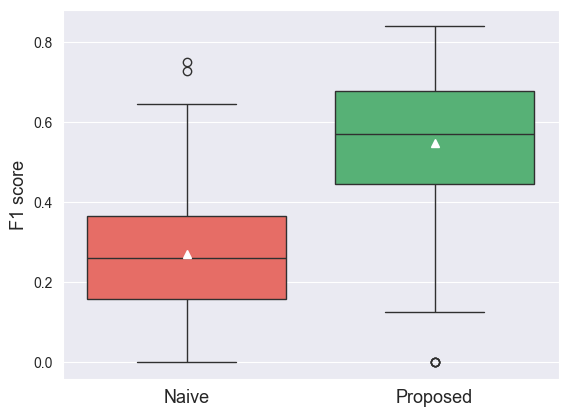

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
my_palette = {"Proposed": "#48c072",
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}

b1 = sns.boxplot(
    data=f1_df,
    x='method',
    y='F1',
    showmeans=True,
    palette=my_palette,
    meanprops={"markerfacecolor":"white", "markeredgecolor":"white"}
)
b1.set(xlabel=None)
b1.tick_params(axis='x', which='major', labelsize=13)
b1.set_ylabel("F1 score", fontsize=13)


/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_24982/2510973028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b2 = sns.boxplot(


Text(0, 0.5, 'Precision')

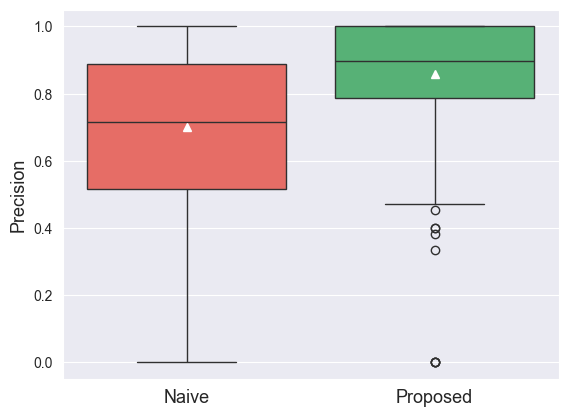

In [7]:
b2 = sns.boxplot(
    data=f1_df,
    x='method',
    y='Precision',
    showmeans=True,
    palette=my_palette,
    meanprops={"markerfacecolor":"white", "markeredgecolor":"white"}
)
b2.set(xlabel=None)
b2.tick_params(axis='x', which='major', labelsize=13)
b2.set_ylabel("Precision", fontsize=13)

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_24982/4067902427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b3 = sns.boxplot(


Text(0, 0.5, 'Recall')

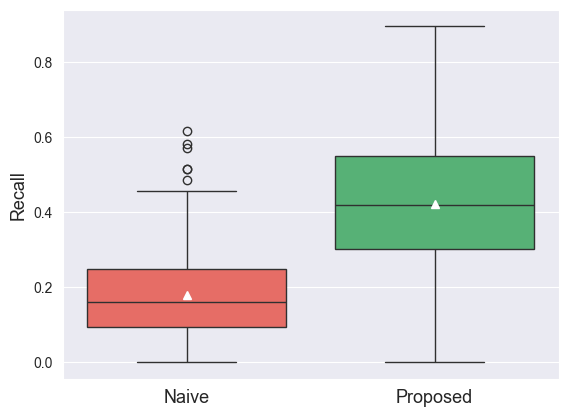

In [8]:
b3 = sns.boxplot(
    data=f1_df,
    x='method',
    y='Recall',
    showmeans=True,
    palette=my_palette,
    meanprops={"markerfacecolor":"white", "markeredgecolor":"white"}
)
b3.set(xlabel=None)
b3.tick_params(axis='x', which='major', labelsize=13)
b3.set_ylabel("Recall", fontsize=13)

<Axes: xlabel='method', ylabel='MSE_test'>

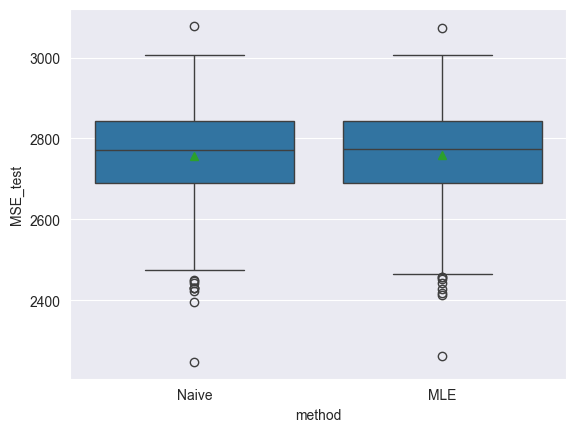

In [9]:
sns.boxplot(
    data=pd.DataFrame(MSE_dict),
    x='method',
    y='MSE_test',
    showmeans=True
)

<Axes: xlabel='method', ylabel='MSE_train'>

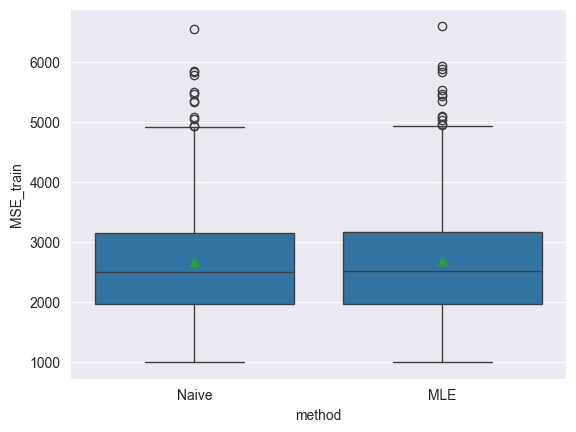

In [10]:
sns.boxplot(
    data=pd.DataFrame(MSE_dict),
    x='method',
    y='MSE_train',
    showmeans=True
)

In [11]:
sorted(interaction_freq_MLE.items(), key=lambda kv: kv[1], reverse=True)

[(('pressure', 'sched_arr_hour'), 395),
 (('dewp', 'wind_speed'), 351),
 (('dewp', 'pressure'), 326),
 (('sched_dep_hour', 'sched_arr_hour'), 324),
 (('dewp', 'sched_dep_hour'), 313),
 (('sched_arr_hour', 'wind_speed'), 305),
 (('dewp', 'sched_arr_hour'), 302),
 (('sched_arr_hour', 'visib'), 266),
 (('dewp', 'visib'), 257),
 (('sched_arr_hour', 'plane_age'), 233),
 (('dewp', 'wind_dir'), 232),
 (('pressure', 'wind_speed'), 217),
 (('dewp', 'plane_age'), 215),
 (('plane_age', 'wind_speed'), 210),
 (('dewp', 'precip'), 203),
 (('sched_arr_hour', 'precip'), 200),
 (('sched_arr_hour', 'wind_dir'), 185),
 (('humid', 'sched_arr_hour'), 181),
 (('dewp', 'humid'), 180),
 (('humid', 'wind_speed'), 166),
 (('distance', 'dewp'), 149),
 (('distance', 'sched_arr_hour'), 146),
 (('humid', 'sched_dep_hour'), 137),
 (('pressure', 'plane_age'), 136),
 (('distance', 'pressure'), 126),
 (('wind_dir', 'wind_speed'), 123),
 (('temp', 'sched_arr_hour'), 116),
 (('pressure', 'sched_dep_hour'), 114),
 (('sche

In [12]:
sorted(main_effects_freq_Naive.items(), key=lambda kv: kv[1], reverse=True)

[('pressure', 420),
 ('temp', 400),
 ('visib', 370),
 ('sched_dep_hour', 359),
 ('wind_speed', 348),
 ('wind_dir', 317),
 ('seats', 281),
 ('sched_arr_hour', 249),
 ('dewp', 207),
 ('precip', 149),
 ('plane_age', 94),
 ('distance', 38),
 ('humid', 1)]

In [13]:
sorted(main_effects_freq_MLE.items(), key=lambda kv: kv[1], reverse=True)

[('pressure', 399),
 ('wind_speed', 381),
 ('visib', 357),
 ('sched_dep_hour', 353),
 ('temp', 324),
 ('dewp', 227),
 ('sched_arr_hour', 214),
 ('precip', 159),
 ('wind_dir', 156),
 ('seats', 102),
 ('plane_age', 89),
 ('distance', 34),
 ('humid', 1)]

In [14]:
def freq_plot(data):
    # build a DataFrame
    df = pd.DataFrame({
        'var_pair': [' & '.join(pair) for pair, _ in data],
        'count':    [cnt              for _, cnt in data]
    })
    
    # plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x='var_pair', y='count', data=df)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.xlabel('Variable Pair')
    plt.ylabel('Count')
    plt.title('Counts by Variable Pair')
    plt.tight_layout()
    plt.show()
    
def freq_plot_overlay(data1, data2):
    import numpy as np
    # turn into dicts for easy lookup
    map1 = {pair:cnt for pair, cnt in data1}
    map2 = {pair:cnt for pair, cnt in data2}
    
    # get top 30 keys from each
    top1 = [pair for pair, _ in sorted(map1.items(), key=lambda x: x[1], reverse=True)[:30]]
    top2 = [pair for pair, _ in sorted(map2.items(), key=lambda x: x[1], reverse=True)[:30]]
    
    # union of those truncated sets
    plot_pairs = list(set(top1) | set(top2))
    
    # optionally sort them by total count descending
    plot_pairs.sort(key=lambda p: map1.get(p, 0) + map2.get(p, 0), reverse=True)
    
    # prepare labels & aligned counts
    labels   = [' & '.join(p) for p in plot_pairs]
    x        = np.arange(len(labels))
    counts1  = [map1.get(p, 0) for p in plot_pairs]
    counts2  = [map2.get(p, 0) for p in plot_pairs]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # wide bars for dataset1
    ax.bar(x,       counts1, width=0.8, label='Naive', alpha=0.8, 
           color=my_palette["Naive"])
    # narrower bars on top for dataset2
    ax.bar(x,       counts2, width=0.4, label='Proposed', alpha=0.6,
           color=my_palette["Proposed"])
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_xlabel('Covariate Pair')
    ax.set_ylabel('Count')
    ax.set_title('Top 30 Significant Interactions')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


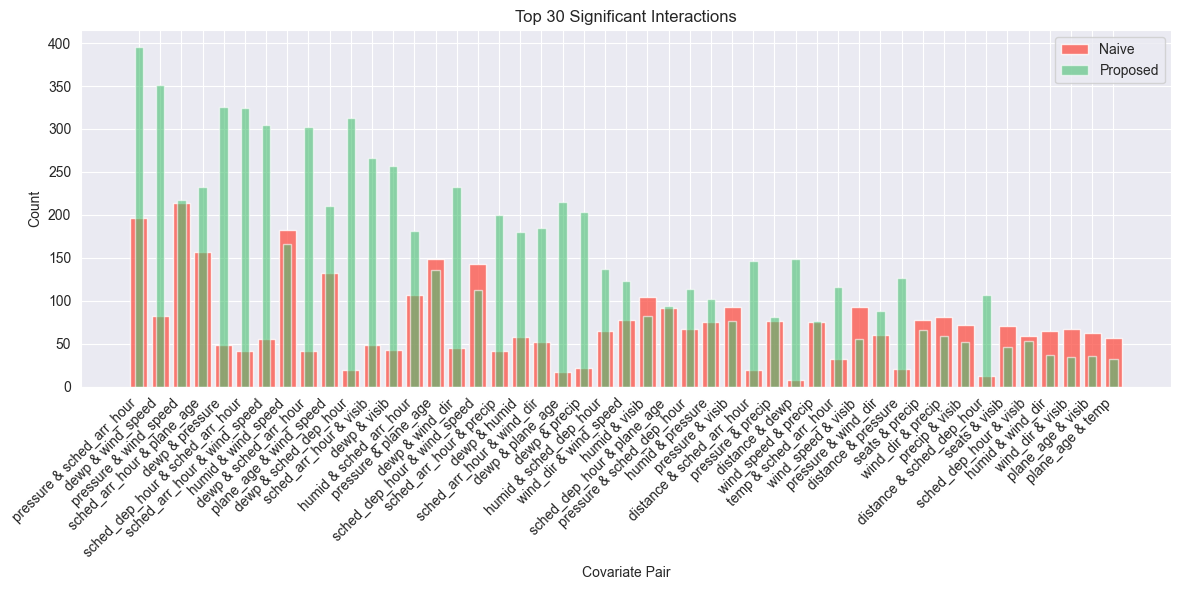

In [90]:
freq_plot_overlay(sorted(interaction_freq_Naive.items(), key=lambda kv: kv[1], reverse=True),
                  sorted(interaction_freq_MLE.items(), key=lambda kv: kv[1], reverse=True))